In [1]:
%matplotlib inline
from fancy_plot import *
import numpy as np
import matplotlib.pyplot as plt

fancy_plot.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/afrancko/anaconda/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/afrancko/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/afrancko/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/afrancko/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/Users/afrancko/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 403, in start
    ioloop.IOLoop.instance().start(

# Energy Spline

[[0.15192939543172268 0.15192939543172268 0.15192939543172268 ...,
  4.103965109414147e-25 4.103965109414147e-25 4.103965109414147e-25]
 [0.15192939543172268 0.15192939543172268 0.15192939543172268 ...,
  4.103965109414147e-25 4.103965109414147e-25 4.103965109414147e-25]
 [0.15192939543172268 0.15192939543172268 0.15192939543172268 ...,
  4.103965109414147e-25 4.103965109414147e-25 4.103965109414147e-25]
 ..., 
 [-- -- -- ..., 0.0006437963308923533 0.0006437963308923533
  0.0006437963308923533]
 [-- -- -- ..., 0.0006437963308923533 0.0006437963308923533
  0.0006437963308923533]
 [-- -- -- ..., 0.0006437963308923533 0.0006437963308923533
  0.0006437963308923533]]


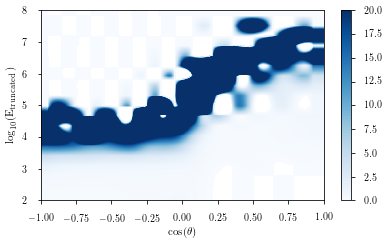

In [31]:
fig, ax = newfig(0.9)
spline = np.load('E_splinespline.npy')[()]
#spline = np.load('../BlazarNeutrino/E_spline.npy')[()]

xdots = 1000
ydots = 1000
x = np.linspace(-1,1,xdots)
y = np.linspace(2,8,ydots)
data = spline(x,y)
data = np.ma.array(data)
data.mask = data <=0
print data
# norm=colors.LogNorm(vmin=data.min(), vmax=data.max())
cbar = ax.pcolormesh(x,y, data.T , cmap=plt.get_cmap('Blues'), vmin = 0, vmax=20)
plt.colorbar(cbar)
ax.set_xlabel(r'$\mathrm{cos}(\theta)$')
ax.set_ylabel(r'$\mathrm{log}_{10}(\mathrm{E_{truncated})$')
# ax.plot(x1, 3.6+2.99*np.sqrt(1-((x1-0.93)/0.83)**2), color='black')
plt.axis([x.min(), x.max(), y.min(), y.max()])
# plt.savefig('../BlazarNeutrino/plots/energy_mpe_spline.png', dpi=300)
plt.show()

In [25]:
cos_zen = np.load('./coszen_splspline.npy')[()]
cos_zen_sig_reco = np.load('./coszen_signal_reco_splspline.npy')[()]
cos_zen_sig = np.load('./coszen_signal_splspline.npy')[()]


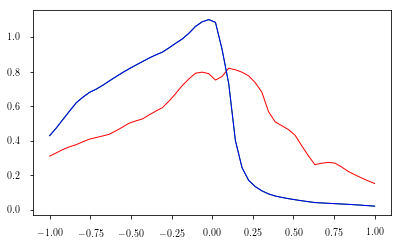

In [26]:
x = np.linspace(-1,1)
plt.plot(x, 10**cos_zen(x))
plt.plot(x, 10**cos_zen_sig(x))
plt.plot(x, 10**cos_zen_sig_reco(x))

plt.show()

# P-Val dist

In [212]:
x = np.load('./data/pvals.npy')

In [215]:
vals, bins = np.histogram(x[(x<np.max(x)) & (x>0)], bins = 100, normed = True)

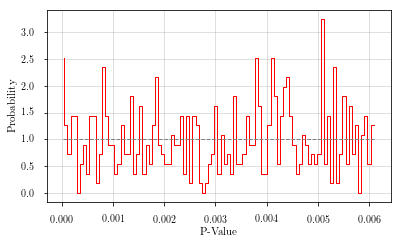

In [222]:
fig, ax = newfig(0.9)
ax.step(setNewEdges(bins),vals*(np.max(bins)-np.min(bins)))
# ax.set_yscale('log')
ax.set_ylabel('Probability')
ax.set_xlabel('P-Value')
line_x = np.linspace(np.min(bins),np.max(bins),1000 )
plt.plot(line_x , np.ones(1000), color='grey', linestyle = '--')
plt.grid()
# plt.savefig('pvals.pdf')
plt.show()

# TS - Dist

In [187]:
llh = np.load('./output/wo_E_weights_llh_100000_2.10_1.npy')

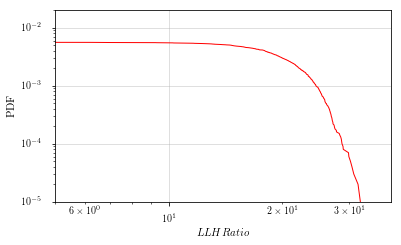

In [188]:
fig, ax = newfig(0.9)
X2 = np.sort(llh)
F2 = np.ones(len(llh)) - np.array(range(len(llh))) / float(len(llh))
ax.plot(X2, F2)
ax.set_xlabel(r'$LLH Ratio$')
ax.set_ylabel('PDF')
ax.set_yscale('log')
ax.set_xlim(5)
ax.set_ylim(1e-5,0.02)
plt.grid(True)
plt.savefig('noE_TS_dist_1e5.pdf')
ax.set_xscale('log')

In [127]:
np.random.uniform(0,3)

2.2596521815107

In [64]:
def delta_psi(theta1,phi1, theta2, phi2):
    sp = np.sin(theta1)*np.cos(phi1)*np.sin(theta2)*np.cos(phi2) \
         + np.sin(theta1)*np.sin(phi1)*np.sin(theta2)*np.sin(phi2) \
         +np.cos(theta1)*np.cos(theta2)
    return np.arccos(sp)

In [65]:
f = np.load('corsika_combined.npy')

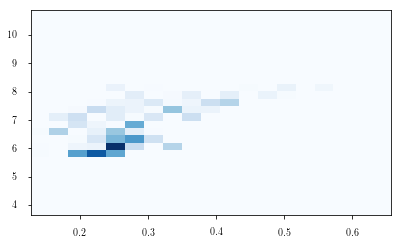

In [82]:
fig, ax = newfig(0.9)
mask = np.isfinite(f['mpe_zen'])
delta_mask = np.degrees(delta_psi(f['zenith'], f['azimuth'], f['mpe_zen'], f['mpe_az']))<5
x = np.cos(f['mpe_zen'][mask & delta_mask]) 
y = np.log10(f['truncatedE'][mask & delta_mask])
H, xedges, yedges = np.histogram2d(x, y,
                                   weights=f['GaisserH3a'][mask & delta_mask],
                                   bins=(20, np.linspace(3.5, 11, 30)),
                                   normed=True)
cbar = ax.pcolormesh(setNewEdges(xedges), setNewEdges(yedges), H.T , cmap=plt.get_cmap('Blues'), vmin = 0)
plt.show()

In [87]:
print sorted(x)

[0.11401611941503435, 0.11486386296426997, 0.11939403172478001, 0.12445730846946794, 0.12640724567365808, 0.13049376612237057, 0.13830766604437256, 0.13938972276296036, 0.13949479533768683, 0.1401695594165176, 0.14757286804232925, 0.1476937314652145, 0.14813982485887683, 0.15021426107295971, 0.15092203959562986, 0.15445235529432344, 0.15644330404900286, 0.15843856045967167, 0.1592931454561721, 0.15995180204085724, 0.16154480766521231, 0.16178199767880463, 0.16384607536145834, 0.16889227037205859, 0.16938190815756043, 0.17035645778865111, 0.17207268270476628, 0.17583321565929791, 0.17605898889923935, 0.1777001466432821, 0.17832533117221014, 0.17937867192987175, 0.17951773055655859, 0.1813054482161576, 0.18409230400773857, 0.18414920806851462, 0.18476494030624574, 0.18575801985256077, 0.18626626086699064, 0.18697038609909922, 0.18753902689077553, 0.18821261193289579, 0.1883130153748675, 0.18874025021803853, 0.19128319063365667, 0.19176459807121171, 0.19235995713833828, 0.1930796397032831